In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
%matplotlib inline

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

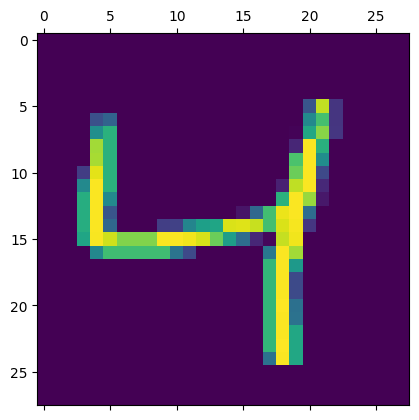

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Scaling our data

X_train = X_train/255
X_test = X_test/255

First of all we should flatten our input given to the neurons. so we reshape them, means X's

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape , X_test_flattened.shape

((60000, 784), (10000, 784))

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Just one Dense Layer

**Now we are going to create layers **

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')                # 28*28 = 784 , output shape = 10
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',             # we use categorical because we have categories between zero to nine, sparce means our output variable which is y_train is actually an integer number
              metrics = ['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4680 - accuracy: 0.8795
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2725 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9252


Sequential: means we're having a stack of layers in our neural network, since it is stack it will accept every layer as one element. So, the first element here is input.




keras.layers.Dense : Keras has this API which Dense means all the neurons here in one layer are connected with every other neuron in the second layer. That is why it called Dense.

In [ ]:
# Accuracy on test dataset

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9236


[0.26941725611686707, 0.9236000180244446]

In [ ]:
y_predict = model.predict(X_test_flattened)


313/313 [==============================] - 1s 2ms/step


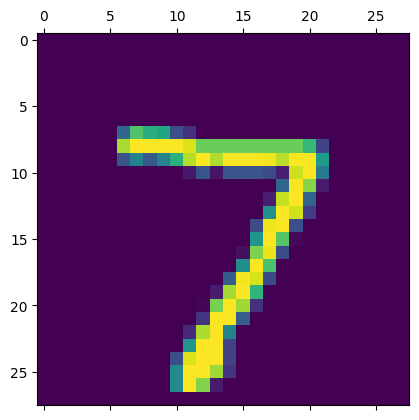

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predict[0]

array([1.9991813e-02, 3.4803611e-07, 5.3736251e-02, 9.6226656e-01,
       2.3946464e-03, 8.1018589e-02, 1.9932218e-06, 9.9981028e-01,
       7.8339942e-02, 5.9329635e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

7

In [ ]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   9,    9,  916,   23,    8,    2,   13,   10,   38,    4],
       [   3,    0,   16,  932,    0,   20,    2,   10,   21,    6],
       [   1,    2,    4,    2,  914,    0,   12,    4,   10,   33],
       [  11,    3,    3,   39,    9,  765,   19,    7,   30,    6],
       [  14,    3,    7,    1,    7,   10,  913,    2,    1,    0],
       [   1,    8,   22,   10,    5,    0,    0,  953,    1,   28],
       [   7,    9,    7,   28,    9,   23,    9,   14,  864,    4],
       [  11,    7,    1,   13,   29,    5,    0,   33,    7,  903]],
      dtype=int32)>

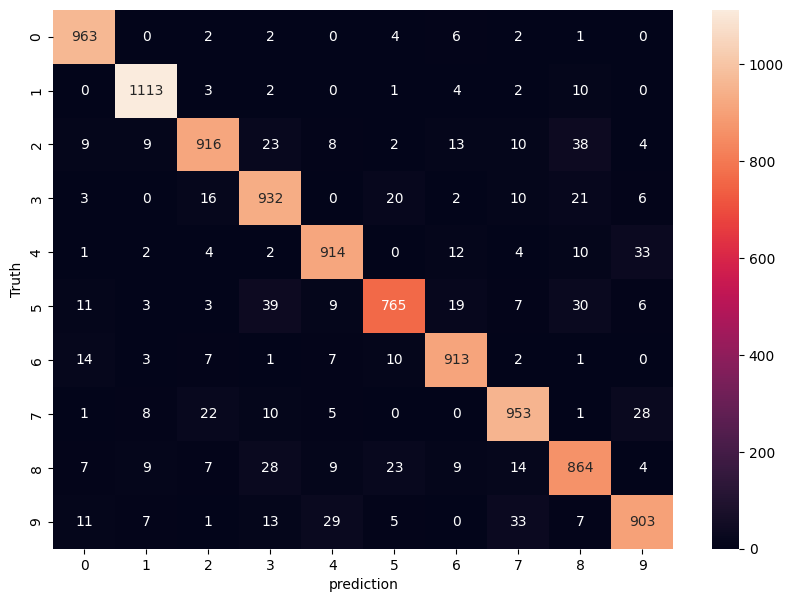

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt= 'd')
plt.xlabel('prediction')
plt.ylabel('Truth')
plt.show()

# Adding Hidden Layers

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu')  ,              # 28*28 = 784 , output shape = 100 wich is passed to next layer
    keras.layers.Dense(10, activation='sigmoid')                                    # output shape = 10 which is the last layer
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',             # we use categorical because we have categories between zero to nine, sparce means our output variable which is y_train is actually an integer number
              metrics = ['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2630 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1179 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0827 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0627 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0495 - accuracy: 0.9850


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9754


[0.084529809653759, 0.9753999710083008]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predict[3]

313/313 [==============================] - 1s 2ms/step


array([9.9969327e-01, 3.4563829e-08, 9.8178357e-02, 8.5169990e-03,
       4.9885832e-05, 1.0913782e-01, 1.4426266e-01, 1.4534746e-02,
       2.6128475e-02, 1.2192106e-02], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm= tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    3,    1,    0,    3,    4,    1,    5,    0],
       [   0, 1127,    2,    1,    0,    1,    1,    0,    3,    0],
       [   2,    2, 1010,    2,    0,    0,    2,    4,    9,    1],
       [   0,    0,    5,  981,    0,   14,    0,    4,    5,    1],
       [   0,    0,    5,    1,  965,    0,    6,    1,    1,    3],
       [   2,    0,    0,    2,    0,  880,    2,    1,    4,    1],
       [   3,    3,    1,    1,    2,   14,  931,    1,    2,    0],
       [   1,    4,   11,    5,    1,    0,    0,  995,    5,    6],
       [   2,    2,    1,    4,    5,    9,    0,    2,  948,    1],
       [   2,    4,    0,    8,   15,   14,    0,    5,    7,  954]],
      dtype=int32)>

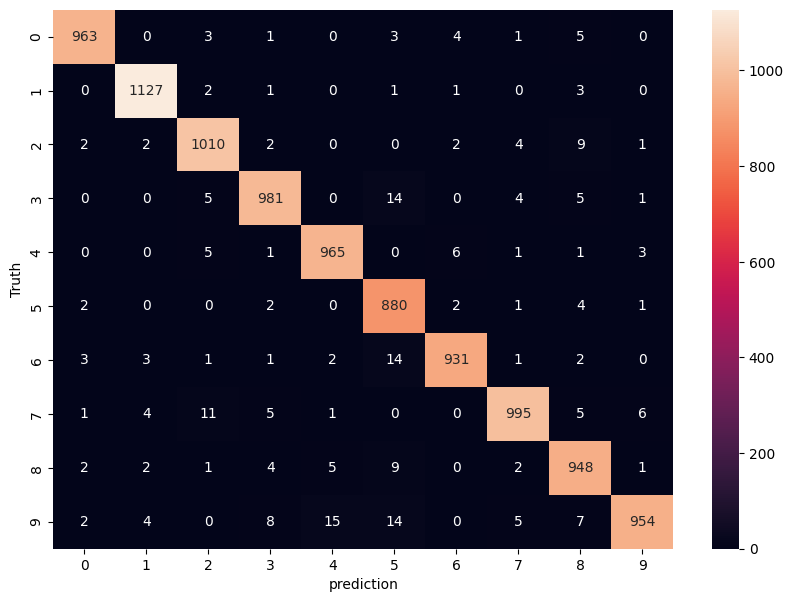

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')
plt.show()

# Using Flatten layer instead of X_train_flattened

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu')  ,              # 28*28 = 784 , output shape = 100 wich is passed to next layer
    keras.layers.Dense(10, activation='sigmoid')                                    # output shape = 10 which is the last layer
])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',             # we use categorical because we have categories between zero to nine, sparce means our output variable which is y_train is actually an integer number
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2707 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1236 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9738
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0663 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9839


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9762


[0.08587999641895294, 0.9761999845504761]

# Differnet Activation Functions

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10, activation='tanh')
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3058 - accuracy: 0.2490
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3004 - accuracy: 0.2288
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2828 - accuracy: 0.1813
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2983 - accuracy: 0.1528
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1403


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1412


[2.30259108543396, 0.1412000060081482]

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6404 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3323 - accuracy: 0.9070
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2525 - accuracy: 0.9295
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2292 - accuracy: 0.9360


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.9398


[0.2145368903875351, 0.9398000240325928]

In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(10, activation='relu')
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3427 - accuracy: 0.1002
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3015 - accuracy: 0.0992
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2992 - accuracy: 0.1002
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3031 - accuracy: 0.0987


In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='relu')
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3975 - accuracy: 0.1253
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3006 - accuracy: 0.0991
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2931 - accuracy: 0.1003
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0987


In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='relu')
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3350 - accuracy: 0.0990
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3024 - accuracy: 0.0988
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3024 - accuracy: 0.0988
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3032 - accuracy: 0.0989
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0987


In [ ]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4189 - accuracy: 0.8932
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2043 - accuracy: 0.9414
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1540 - accuracy: 0.9560
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1223 - accuracy: 0.9653
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0999 - accuracy: 0.9717
